<h1 style="text-align: center;">INR-LKR Currency Exchange Prediction</h1>

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("Original Datasets/INR_Data.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/09/2024,3.5793,3.5982,3.6004,3.5772,NaN,-0.52%
1,05/08/2024,3.5982,3.5911,3.5988,3.5904,NaN,0.20%
2,05/07/2024,3.5911,3.5575,3.5926,3.5547,NaN,0.94%
3,05/06/2024,3.5576,3.5586,3.5586,3.5520,NaN,-0.11%
4,05/03/2024,3.5617,3.5603,3.5669,3.5589,NaN,0.16%
...,...,...,...,...,...,...,...
3740,01/07/2010,2.5013,2.5038,2.5118,2.4907,NaN,-0.02%
3741,01/06/2010,2.5019,2.4756,2.5019,2.4734,NaN,1.12%
3742,01/05/2010,2.4743,2.4703,2.4829,2.4687,NaN,0.08%
3743,01/04/2010,2.4722,2.4570,2.4764,2.4518,NaN,0.74%


In [29]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
dtype: object

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %            object
dtype: object

In [31]:
df.drop(columns=['Vol.'], inplace=True)
df

,Date,Price,Open,High,Low,Change %
0,2024-05-09,3.5793,3.5982,3.6004,3.5772,-0.52%
1,2024-05-08,3.5982,3.5911,3.5988,3.5904,0.20%
2,2024-05-07,3.5911,3.5575,3.5926,3.5547,0.94%
3,2024-05-06,3.5576,3.5586,3.5586,3.5520,-0.11%
4,2024-05-03,3.5617,3.5603,3.5669,3.5589,0.16%
...,...,...,...,...,...,...
3740,2010-01-07,2.5013,2.5038,2.5118,2.4907,-0.02%
3741,2010-01-06,2.5019,2.4756,2.5019,2.4734,1.12%
3742,2010-01-05,2.4743,2.4703,2.4829,2.4687,0.08%
3743,2010-01-04,2.4722,2.4570,2.4764,2.4518,0.74%


In [32]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

## Visualizations

### 1. Date against Parameters

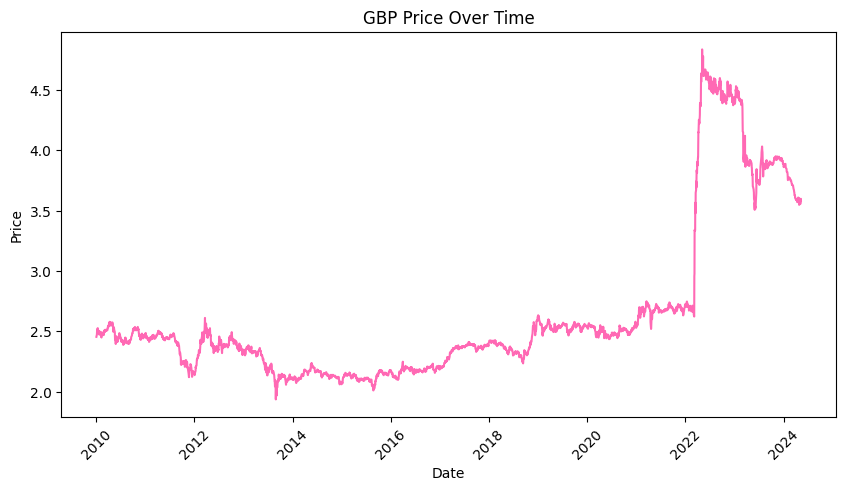

In [33]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Price"], color='hotpink')
plt.title("GBP Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

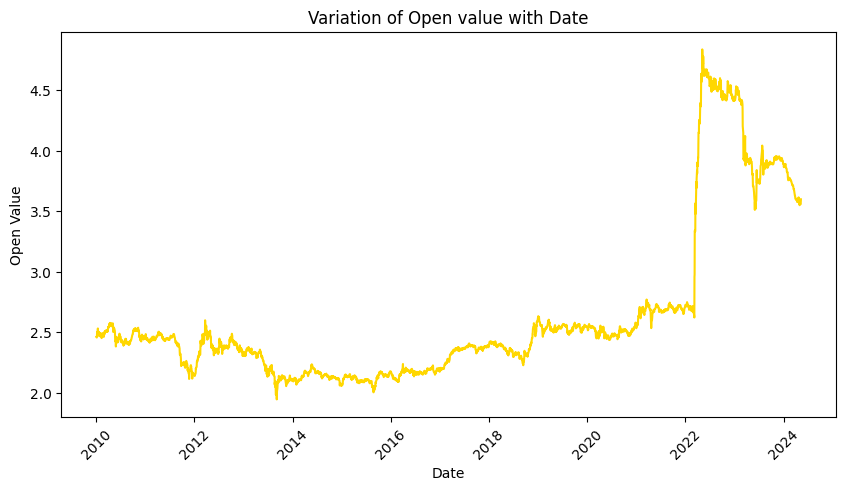

In [34]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Open"], color='gold')
plt.title("Variation of Open value with Date")
plt.xlabel("Date")
plt.ylabel("Open Value")
plt.xticks(rotation=45)
plt.show()

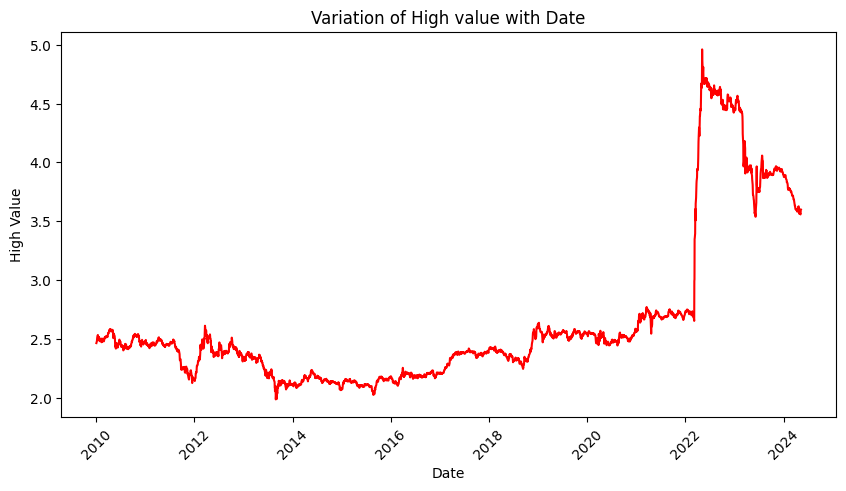

In [35]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["High"], color='red')
plt.title("Variation of High value with Date")
plt.xlabel("Date")
plt.ylabel("High Value")
plt.xticks(rotation=45)
plt.show()

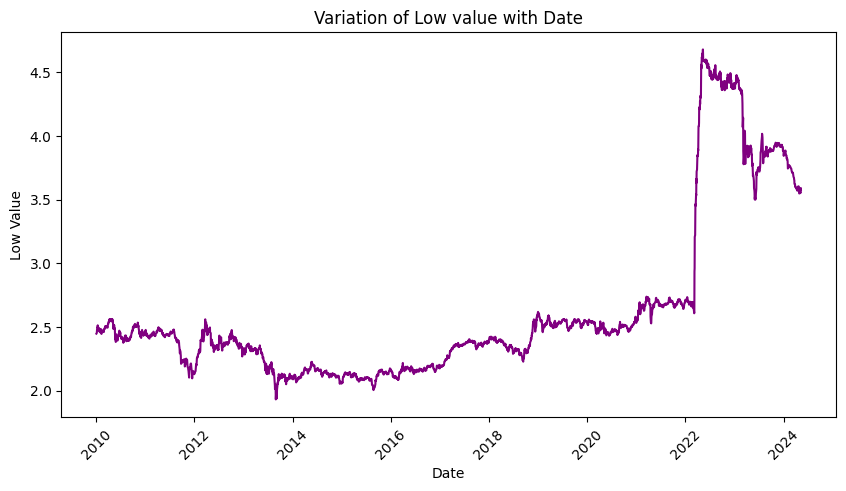

In [36]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Low"], color='purple')
plt.title("Variation of Low value with Date")
plt.xlabel("Date")
plt.ylabel("Low Value")
plt.xticks(rotation=45)
plt.show()

### 2. Price against Parameters

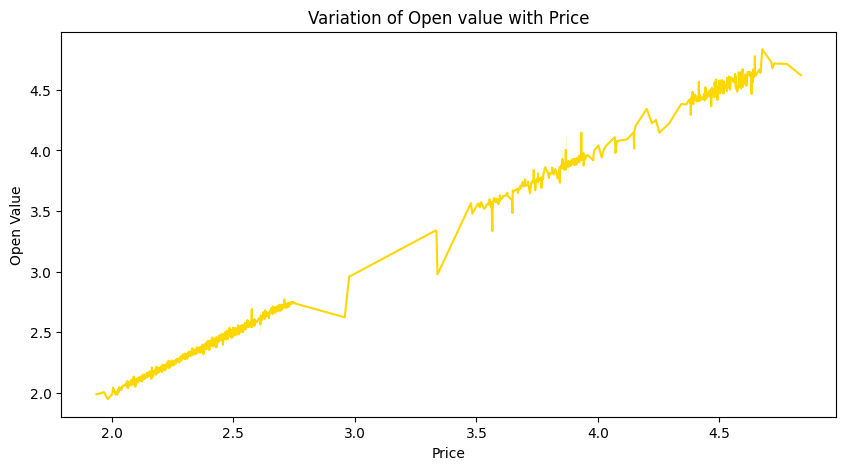

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["Open"], color='gold')
plt.title("Variation of Open value with Price")
plt.xlabel("Price")
plt.ylabel("Open Value")
plt.show()

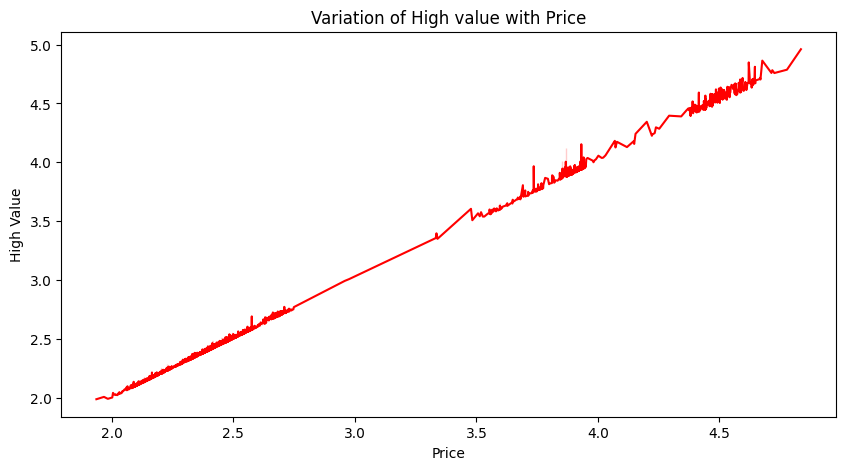

In [38]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["High"], color='red')
plt.title("Variation of High value with Price")
plt.xlabel("Price")
plt.ylabel("High Value")
plt.show()

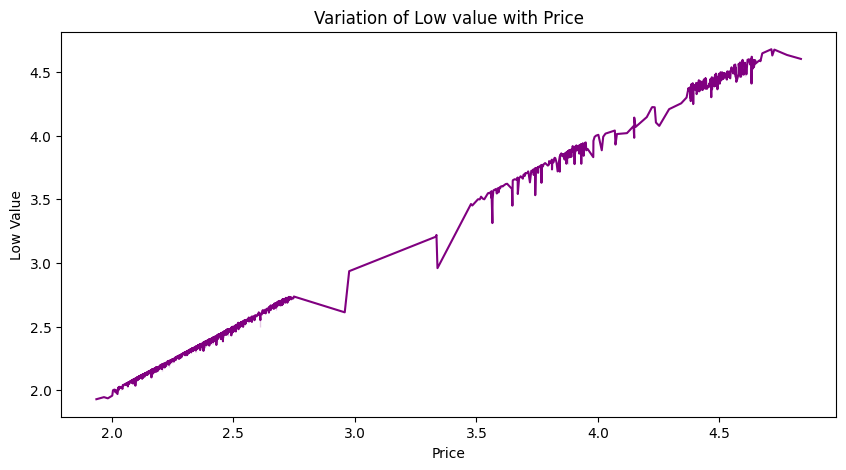

In [39]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["Low"], color='purple')
plt.title("Variation of Low value with Price")
plt.xlabel("Price")
plt.ylabel("Low Value")
plt.show()

## Model Synthesis

In [40]:
df.drop(columns=["Open","High","Low","Change %"], inplace=True)
df

,Date,Price
0,2024-05-09,3.5793
1,2024-05-08,3.5982
2,2024-05-07,3.5911
3,2024-05-06,3.5576
4,2024-05-03,3.5617
...,...,...
3740,2010-01-07,2.5013
3741,2010-01-06,2.5019
3742,2010-01-05,2.4743
3743,2010-01-04,2.4722


In [41]:
from pmdarima import auto_arima 
from sklearn.metrics import mean_absolute_error,mean_squared_error

### 1. ARIMA Model

3 1 0
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2996
Model:                 ARIMA(3, 1, 0)   Log Likelihood                7279.280
Date:                Fri, 10 May 2024   AIC                         -14550.559
Time:                        18:08:03   BIC                         -14526.541
Sample:                             0   HQIC                        -14541.919
                               - 2996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1106      0.007    -15.315      0.000      -0.125      -0.096
ar.L2          0.1337      0.005     28.730      0.000       0.125       0.143
ar.L3          0.1355      0.006     22.487   

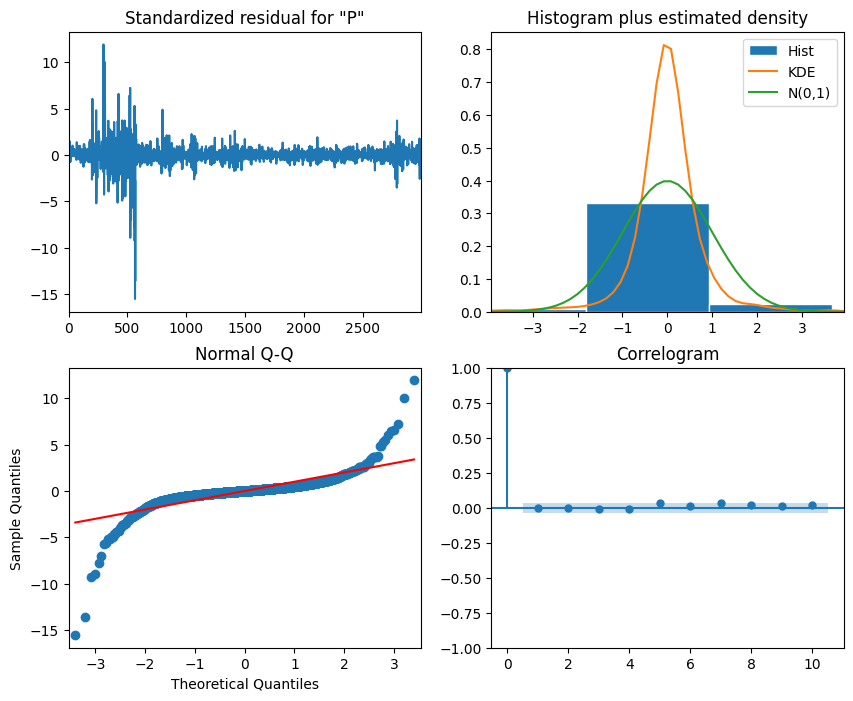

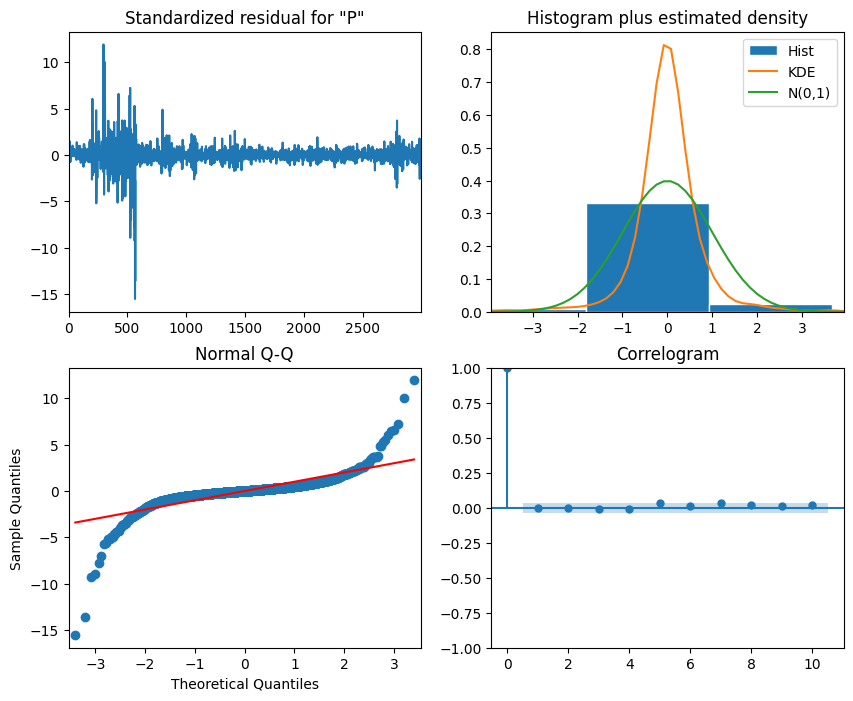

In [42]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df)*0.8)
train_col, test_col = df.iloc[:train_size], df.iloc[train_size:]

auto_arima_model = auto_arima(train_col['Price'], seasonal=False, trace=False)
p,d,q = auto_arima_model.order
print(p,d,q)
arima_model = ARIMA(train_col['Price'], order=(p,d,q))
arima_model = arima_model.fit()
print(arima_model.summary())
arima_model.plot_diagnostics(figsize=(10,8))

In [43]:
arima_testing_predictions = arima_model.forecast(steps=len(test_col))
mse = mean_squared_error(test_col['Price'], arima_testing_predictions)
mae = mean_absolute_error(test_col['Price'], arima_testing_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error for the ARIMA model is {mse}")
print(f"Mean Absolute Error for the ARIMA model is {mae}")
print(f"Root Mean Sqaured Error for the ARIMA model is {rmse}")

Mean Squared Error for the ARIMA model is 0.010714268418627586
Mean Absolute Error for the ARIMA model is 0.0877227447768175
Root Mean Sqaured Error for the ARIMA model is 0.10350975035535341


### 2. SARIMAX Model

3 1 0
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 2996
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 12)   Log Likelihood                6925.530
Date:                            Fri, 10 May 2024   AIC                         -13837.059
Time:                                    18:08:11   BIC                         -13795.055
Sample:                                         0   HQIC                        -13821.946
                                           - 2996                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1107      0.008    -14.426      0.000      -0.126      -0.096
ar.L2          0.1098      0.

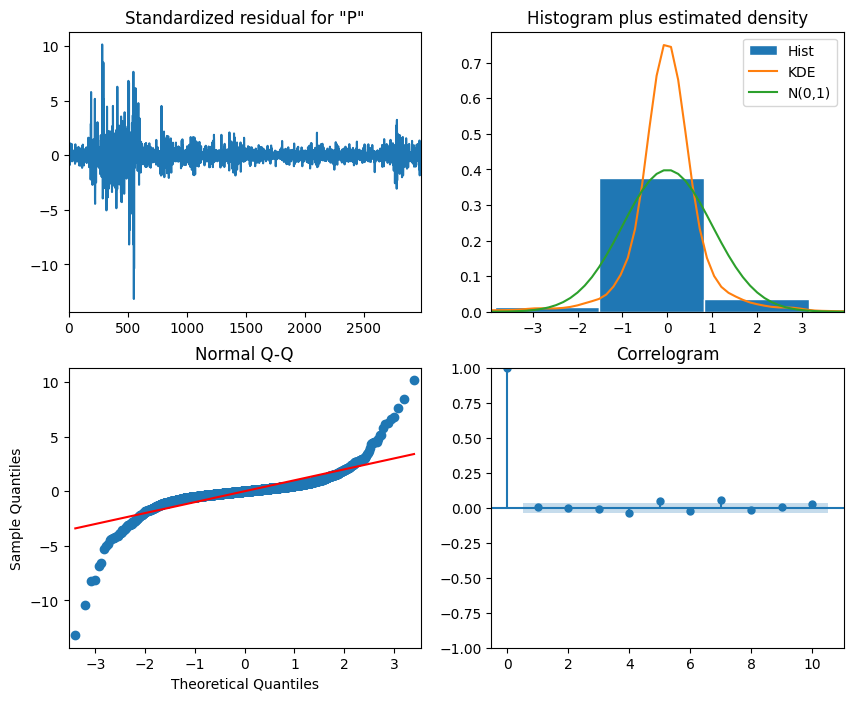

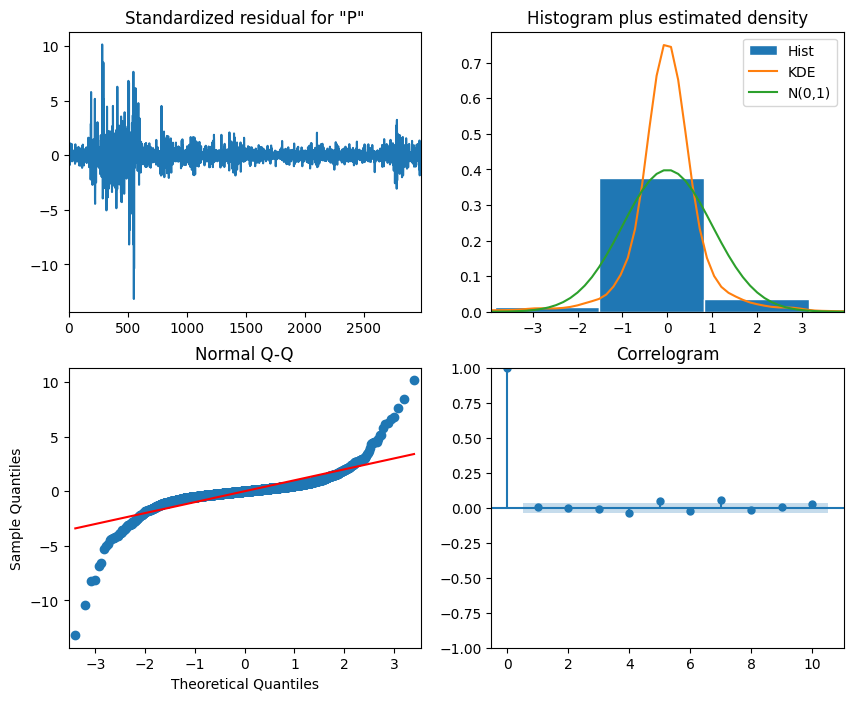

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df)*0.8)
train_col, test_col = df.iloc[:train_size], df.iloc[train_size:]

print(p,d,q)
sarimax_model = SARIMAX(train_col['Price'], order=(p,d,q), seasonal_order=(p,d,q,12))
sarimax_model = sarimax_model.fit()
print(sarimax_model.summary())
sarimax_model.plot_diagnostics(figsize=(10,8))

In [45]:
sarimax_testing_predictions = sarimax_model.forecast(steps=len(test_col))
mse = mean_squared_error(test_col['Price'], sarimax_testing_predictions)
mae = mean_absolute_error(test_col['Price'], sarimax_testing_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error for the SARIMAX model is {mse}")
print(f"Mean Absolute Error for the SARIMAX model is {mae}")
print(f"Root Mean Sqaured Error for the SARIMAX model is {rmse}")

Mean Squared Error for the SARIMAX model is 0.10474250816791374
Mean Absolute Error for the SARIMAX model is 0.2824293321975098
Root Mean Sqaured Error for the SARIMAX model is 0.3236394725121053


### 3. LSTM Model

In [46]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

In [47]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

scaler = MinMaxScaler(feature_range=(0,1))
df["Price"] = scaler.fit_transform(df["Price"].values.reshape(-1, 1))

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

sequence_length = 10
x_train = create_sequences(train['Price'], sequence_length)
x_test = create_sequences(test['Price'], sequence_length)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

print(lstm_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None


In [48]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm_model.fit(x_train, train['Price'][sequence_length:], epochs=100, batch_size=32)

# evaluating the model
loss = lstm_model.evaluate(x_test, test['Price'][sequence_length:])

# predicting the values
lstm_predictions = lstm_model.predict(x_test)

# getting the actual values using inverse transformation
lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)

lstm_actual_vals = scaler.inverse_transform(test["Price"][sequence_length:].values.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(lstm_actual_vals, lstm_predictions_actual)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(lstm_actual_vals, lstm_predictions_actual)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error for LSTM model is {mae}")
print(f"Mean Squared Error for LSTM model is {mse}")
print(f"Root Mean Squared Error for LSTM model is {rmse}")

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0290
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2657e-04
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0607e-04
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7852e-04
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

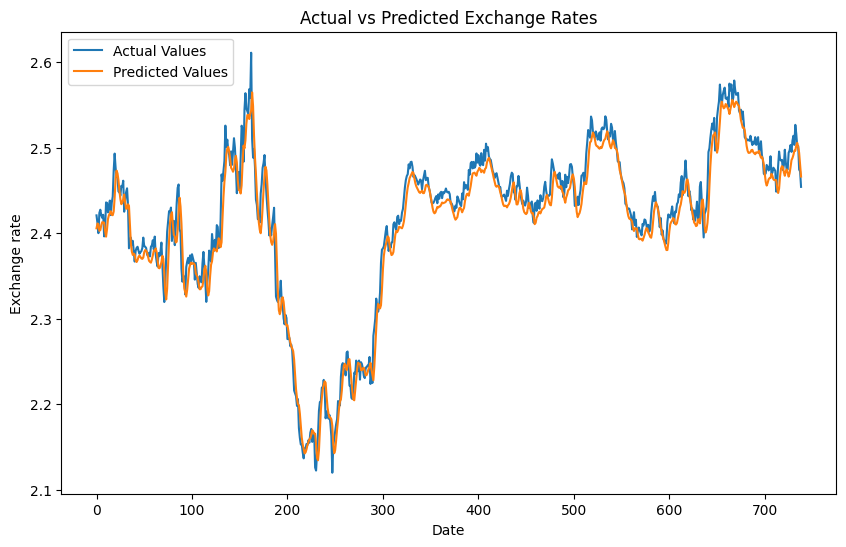

In [49]:
# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(lstm_actual_vals, label='Actual Values')
plt.plot(lstm_predictions_actual, label='Predicted Values')
plt.title('Actual vs Predicted Exchange Rates')
plt.xlabel("Date")
plt.ylabel("Exchange rate")
plt.legend()
plt.show()

### Saving the best model

In [50]:
import os
directory = "Models"

if not os.path.exists(directory):
    os.makedirs(directory)
lstm_model.save("Models/INR_Model.keras")

## Analysis

For the Indian Rupees, all three models seemed to works significantly well compared to how they performed for the USD and GBP. However, when considering the evaluation metrics, LSTM seems to perform better than the ARIMA and the SARIMAX.